# Project: Dog vs Cat Classification

In [115]:
from pathlib import Path
import os
import torch
from torch import nn

In [116]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [117]:
data_path = Path("data/")
train_path = data_path / "train"
test_path = data_path / "test"

train_path, test_path

(WindowsPath('data/train'), WindowsPath('data/test'))

In [118]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Dog, Shape: (471, 500, 3)')

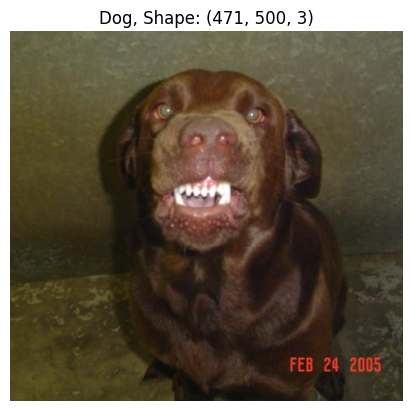

In [119]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
image_path_list = list(data_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)
img_is_array = np.asarray(img)

plt.imshow(img)
plt.axis(False)
plt.title(f"{image_class}, Shape: {img_is_array.shape}")

In [120]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [121]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [122]:
transformed_image = data_transform(img)
transformed_image

tensor([[[0.3843, 0.3882, 0.3922,  ..., 0.3804, 0.3843, 0.3804],
         [0.4000, 0.4078, 0.4000,  ..., 0.3804, 0.3804, 0.3882],
         [0.4078, 0.4078, 0.4039,  ..., 0.3843, 0.3686, 0.3725],
         ...,
         [0.2039, 0.2157, 0.2078,  ..., 0.3294, 0.3216, 0.3098],
         [0.2196, 0.2314, 0.2078,  ..., 0.3216, 0.3294, 0.3216],
         [0.2353, 0.2314, 0.1961,  ..., 0.3216, 0.3412, 0.3255]],

        [[0.3882, 0.3961, 0.3961,  ..., 0.3765, 0.3882, 0.3882],
         [0.3961, 0.4078, 0.4000,  ..., 0.3765, 0.3765, 0.3843],
         [0.4039, 0.4078, 0.4078,  ..., 0.3843, 0.3647, 0.3725],
         ...,
         [0.1922, 0.2039, 0.1922,  ..., 0.2980, 0.2863, 0.2745],
         [0.2078, 0.2196, 0.1961,  ..., 0.2863, 0.2941, 0.2863],
         [0.2314, 0.2275, 0.1804,  ..., 0.2980, 0.3137, 0.2980]],

        [[0.3176, 0.3294, 0.3294,  ..., 0.2627, 0.2706, 0.2706],
         [0.3255, 0.3333, 0.3294,  ..., 0.2510, 0.2510, 0.2588],
         [0.3333, 0.3373, 0.3333,  ..., 0.2549, 0.2314, 0.

Text(0.5, 1.0, 'Dog, Shape: torch.Size([3, 64, 64])')

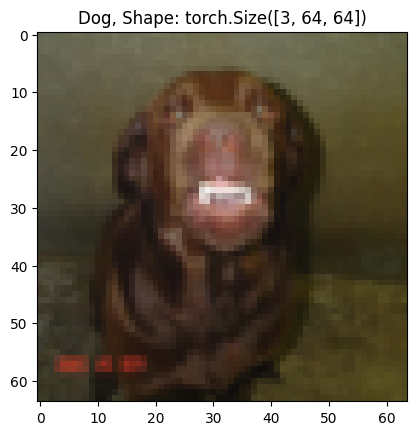

In [123]:
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title(f"{image_class}, Shape: {transformed_image.shape}")

# Loading data using 'ImageFolder'

In [124]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_path,
                                 transform=test_data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 13840
     Root location: data\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 3156
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [125]:
# Get class names as list
class_names = train_data.classes
class_names

['Cat', 'Dog']

In [126]:
# Get class names as dictionary 
class_dict = train_data.class_to_idx
class_dict

{'Cat': 0, 'Dog': 1}

In [127]:
len(train_data), len(test_data)

(13840, 3156)

# Turn loaded images into 'DataLoader'

In [128]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x160494484c0>,
 <torch.utils.data.dataloader.DataLoader at 0x16049448220>)

In [129]:
img_custom, label_custom = next(iter(train_dataloader))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [130]:
class DogVsCat(nn.Module):
    def __init__(self, input_shape, hidden_layers, output_shape):
        super().__init__()

        self.conv_block_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers * 2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_block_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layers*2,
                      out_channels=hidden_layers*2*2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2*2),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=hidden_layers*2*2,
                      out_channels=hidden_layers*2*2*2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2*2*2),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.classification = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*16*16*8,
                      #out_features=output_shape
                      out_features=128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, output_shape)
        )

    def forward(self, x):
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_1(x)
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_2(x)
        #print(f"Shape: {x.shape}")
        x = self.classification(x)
        #print(f"Shape: {x.shape}")
        return x
        

In [131]:
model_0 = DogVsCat(input_shape=3, hidden_layers=16, output_shape=1).to(device)
model_0

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.1, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6):

In [132]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [133]:
# Check the correct shape on dummy tensor
dummy_input = torch.randn(32, 3, 64, 64)
output = model_0(dummy_input.to(device))
output

tensor([[-0.5865],
        [ 0.2831],
        [-0.0834],
        [-0.3740],
        [ 0.0992],
        [-0.0889],
        [-0.2755],
        [ 0.1815],
        [-0.2296],
        [-0.1054],
        [-0.9373],
        [ 0.3053],
        [ 0.5497],
        [ 0.1370],
        [ 0.2216],
        [ 0.1459],
        [-0.0265],
        [ 0.1734],
        [ 0.1291],
        [ 0.5139],
        [-0.2377],
        [ 0.4564],
        [-0.1900],
        [ 0.3331],
        [-0.4344],
        [-0.2820],
        [-0.3924],
        [-0.3396],
        [-0.1875],
        [-0.1066],
        [-0.2698],
        [ 0.3770]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [134]:
from tqdm import tqdm
import time

In [135]:
epochs = 1

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    model_0.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        y = y.unsqueeze(dim=1).float()
        
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    train_loss /= len(train_dataloader)
    train_acc = (train_acc / len(train_dataloader)) * 100
    
    model_0.eval()
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model_0(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            test_acc += (test_pred_class==y).sum().item() / len(test_pred)
    
        test_loss /= len(test_dataloader)
        test_acc = (test_acc / len(test_dataloader)) * 100

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss}, Test Accuracy: {test_acc}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\piotr\anaconda3\envs\test\lib\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 1/1 [00:34<00:00, 34.74s/it]

Epoch: 0 | Train Loss: 0.8549, Train Accuracy: 56.02 | Test Loss: 0.6484841701358256, Test Accuracy: 63.09974747474747
Total time: 34.74440336227417


# Plot model_0 results

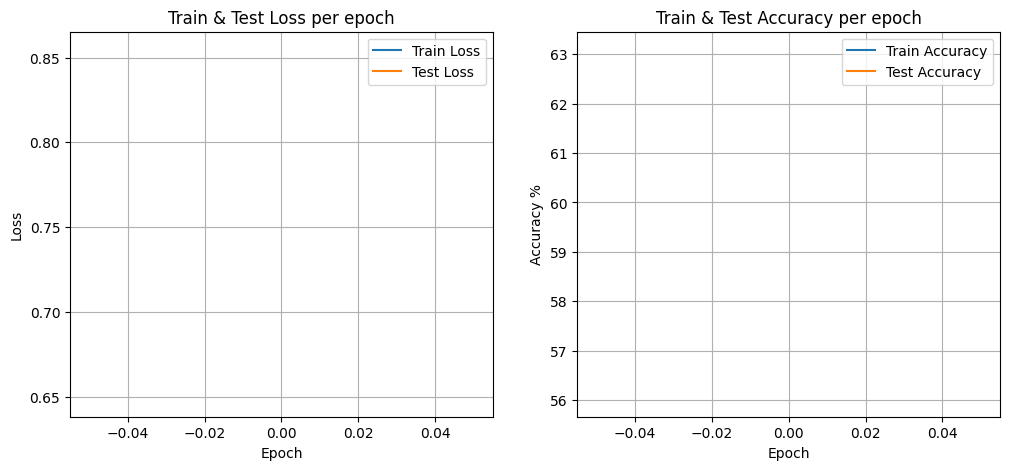

In [136]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()



In [137]:
print(len(results["train_loss"]), len(results["test_loss"]))
print(len(results["train_acc"]), len(results["test_acc"]))

1 1
1 1


In [138]:
# Build train and test function to make training easier
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               device=device):

    train_loss, correct_preds, total_samples = 0, 0, 0
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y = y.unsqueeze(dim=1).float()
        
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        #train_acc += (y_pred_class==y).sum().item() / len(y_pred)
        correct_preds += (y_pred_class == y).sum().item()
        total_samples += y.size(0)

    train_loss /= len(dataloader)
    #train_acc = (train_acc / len(dataloader)) * 100
    train_acc = (correct_preds / total_samples) * 100
    
    return train_loss, train_acc

In [139]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

    test_loss, correct_preds, total_samples = 0, 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            #test_acc += (test_pred_class==y).sum().item() / len(test_pred)
            correct_preds += (test_pred_class == y).sum().item()
            total_samples += y.size(0)
    
    test_loss /= len(dataloader)
    #test_acc = (test_acc / len(dataloader)) * 100
    test_acc = (correct_preds / total_samples) * 100
    return test_loss, test_acc

# Augmentation data

In [140]:
train_data_transform_augmentation = transforms.Compose([
    #transforms.Resize(size=(64, 64)),
    transforms.RandomResizedCrop(size=(64, 64), scale=(0.9, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=25),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
    #transforms.RandomAffine(degrees=15, translate=(1, 1)),
    #transforms.TrivialAugmentWide(num_magnitude_bins=31), # used to differentiate the data
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

test_data = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
train_data_transform_augmentation, test_data

(Compose(
     RandomResizedCrop(size=(64, 64), scale=(0.9, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
     RandomHorizontalFlip(p=0.5)
     RandomRotation(degrees=[-25.0, 25.0], interpolation=nearest, expand=False, fill=0)
     ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.05, 0.05))
     GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ))

In [141]:
train_data_augmentation = datasets.ImageFolder(root=train_path,
                                               transform=train_data_transform_augmentation)
test_data_augmentation = datasets.ImageFolder(root=test_path,
                                              transform=test_data)

train_data_augmentation, test_data_augmentation

(Dataset ImageFolder
     Number of datapoints: 13840
     Root location: data\train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(64, 64), scale=(0.9, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-25.0, 25.0], interpolation=nearest, expand=False, fill=0)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.05, 0.05))
                GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ),
 Dataset ImageFolder
     Number of datapoints: 3156
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.

In [142]:
BATCH_SIZE = 64
NUM_WORKERS = 4

train_dataloader_augmentation = DataLoader(dataset=train_data_augmentation,
                                           batch_size=BATCH_SIZE,
                                           num_workers=NUM_WORKERS,
                                           shuffle=True)

test_dataloader_augmentation = DataLoader(dataset=test_data_augmentation,
                                          batch_size=BATCH_SIZE,
                                          num_workers=NUM_WORKERS,
                                          shuffle=False)

train_dataloader_augmentation, test_dataloader_augmentation

(<torch.utils.data.dataloader.DataLoader at 0x16014204790>,
 <torch.utils.data.dataloader.DataLoader at 0x16014204a30>)

In [143]:
len(class_names)

2

In [144]:
model_1 = DogVsCat(input_shape=3, hidden_layers=8, output_shape=1).to(device)
model_1

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.1, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU

In [145]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(params=model_1.parameters(), lr=0.001, weight_decay=0.01)
                             #lr=0.00025)
#optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01, momentum=0.9)
loss_fn, optimizer

(BCEWithLogitsLoss(),
 AdamW (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0.01
 ))

In [146]:
# Train model_1 on augmentation data
epochs = 100

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    train_loss, train_acc = train_step(model=model_1,
               dataloader=train_dataloader_augmentation,
               loss_fn=loss_fn,
               optimizer=optimizer)

    test_loss, test_acc = test_step(model=model_1,
              dataloader=test_dataloader_augmentation,
              loss_fn=loss_fn)

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

  1%|          | 1/100 [00:47<1:18:23, 47.51s/it]

Epoch: 0 | Train Loss: 0.7846, Train Accuracy: 55.90 | Test Loss: 0.6624, Test Accuracy: 59.95


  2%|▏         | 2/100 [01:34<1:17:23, 47.38s/it]

Epoch: 1 | Train Loss: 0.6556, Train Accuracy: 60.83 | Test Loss: 0.6194, Test Accuracy: 67.24


  3%|▎         | 3/100 [02:22<1:16:59, 47.63s/it]

Epoch: 2 | Train Loss: 0.6383, Train Accuracy: 63.92 | Test Loss: 0.5999, Test Accuracy: 71.48


  4%|▍         | 4/100 [03:09<1:15:56, 47.46s/it]

Epoch: 3 | Train Loss: 0.6189, Train Accuracy: 66.27 | Test Loss: 0.5781, Test Accuracy: 71.55


  5%|▌         | 5/100 [03:59<1:16:31, 48.34s/it]

Epoch: 4 | Train Loss: 0.6011, Train Accuracy: 67.86 | Test Loss: 0.5761, Test Accuracy: 69.80


  6%|▌         | 6/100 [04:50<1:17:13, 49.29s/it]

Epoch: 5 | Train Loss: 0.5879, Train Accuracy: 69.83 | Test Loss: 0.5465, Test Accuracy: 73.23


  7%|▋         | 7/100 [05:40<1:16:35, 49.42s/it]

Epoch: 6 | Train Loss: 0.5803, Train Accuracy: 70.21 | Test Loss: 0.5454, Test Accuracy: 73.67


  8%|▊         | 8/100 [06:30<1:16:02, 49.60s/it]

Epoch: 7 | Train Loss: 0.5717, Train Accuracy: 71.18 | Test Loss: 0.5396, Test Accuracy: 75.79


  9%|▉         | 9/100 [07:21<1:16:02, 50.13s/it]

Epoch: 8 | Train Loss: 0.5697, Train Accuracy: 71.43 | Test Loss: 0.5049, Test Accuracy: 77.50


 10%|█         | 10/100 [08:12<1:15:30, 50.34s/it]

Epoch: 9 | Train Loss: 0.5470, Train Accuracy: 72.92 | Test Loss: 0.4706, Test Accuracy: 78.96


 11%|█         | 11/100 [09:03<1:14:45, 50.39s/it]

Epoch: 10 | Train Loss: 0.5378, Train Accuracy: 73.27 | Test Loss: 0.4681, Test Accuracy: 77.76


 12%|█▏        | 12/100 [09:53<1:13:43, 50.26s/it]

Epoch: 11 | Train Loss: 0.5379, Train Accuracy: 73.82 | Test Loss: 0.4634, Test Accuracy: 77.88


 13%|█▎        | 13/100 [10:42<1:12:39, 50.11s/it]

Epoch: 12 | Train Loss: 0.5277, Train Accuracy: 74.74 | Test Loss: 0.4630, Test Accuracy: 79.44


 14%|█▍        | 14/100 [11:32<1:11:42, 50.03s/it]

Epoch: 13 | Train Loss: 0.5198, Train Accuracy: 75.31 | Test Loss: 0.4489, Test Accuracy: 79.59


 15%|█▌        | 15/100 [12:21<1:10:11, 49.55s/it]

Epoch: 14 | Train Loss: 0.5144, Train Accuracy: 76.03 | Test Loss: 0.4412, Test Accuracy: 79.75


 16%|█▌        | 16/100 [13:08<1:08:35, 49.00s/it]

Epoch: 15 | Train Loss: 0.5056, Train Accuracy: 76.46 | Test Loss: 0.4413, Test Accuracy: 81.08


 17%|█▋        | 17/100 [13:56<1:07:06, 48.51s/it]

Epoch: 16 | Train Loss: 0.5022, Train Accuracy: 76.19 | Test Loss: 0.4388, Test Accuracy: 81.21


 18%|█▊        | 18/100 [14:43<1:05:52, 48.20s/it]

Epoch: 17 | Train Loss: 0.4942, Train Accuracy: 76.88 | Test Loss: 0.4345, Test Accuracy: 81.24


 19%|█▉        | 19/100 [15:31<1:04:57, 48.12s/it]

Epoch: 18 | Train Loss: 0.4909, Train Accuracy: 77.17 | Test Loss: 0.4746, Test Accuracy: 74.33


 20%|██        | 20/100 [16:19<1:03:51, 47.89s/it]

Epoch: 19 | Train Loss: 0.4947, Train Accuracy: 76.81 | Test Loss: 0.3987, Test Accuracy: 83.14


 21%|██        | 21/100 [17:06<1:02:54, 47.78s/it]

Epoch: 20 | Train Loss: 0.4824, Train Accuracy: 78.04 | Test Loss: 0.4115, Test Accuracy: 81.65


 22%|██▏       | 22/100 [17:54<1:01:57, 47.66s/it]

Epoch: 21 | Train Loss: 0.4785, Train Accuracy: 78.01 | Test Loss: 0.4074, Test Accuracy: 81.65


 23%|██▎       | 23/100 [18:42<1:01:39, 48.05s/it]

Epoch: 22 | Train Loss: 0.4740, Train Accuracy: 78.48 | Test Loss: 0.4067, Test Accuracy: 82.03


 24%|██▍       | 24/100 [19:34<1:02:02, 48.98s/it]

Epoch: 23 | Train Loss: 0.4716, Train Accuracy: 78.45 | Test Loss: 0.4105, Test Accuracy: 83.94


 25%|██▌       | 25/100 [20:23<1:01:16, 49.02s/it]

Epoch: 24 | Train Loss: 0.4620, Train Accuracy: 78.91 | Test Loss: 0.4190, Test Accuracy: 79.06


 26%|██▌       | 26/100 [21:14<1:01:06, 49.54s/it]

Epoch: 25 | Train Loss: 0.4701, Train Accuracy: 78.33 | Test Loss: 0.3783, Test Accuracy: 84.89


 27%|██▋       | 27/100 [22:04<1:00:41, 49.89s/it]

Epoch: 26 | Train Loss: 0.4678, Train Accuracy: 78.57 | Test Loss: 0.4638, Test Accuracy: 74.81


 28%|██▊       | 28/100 [22:54<59:54, 49.92s/it]  

Epoch: 27 | Train Loss: 0.4576, Train Accuracy: 79.09 | Test Loss: 0.3880, Test Accuracy: 85.01


 29%|██▉       | 29/100 [23:44<58:59, 49.85s/it]

Epoch: 28 | Train Loss: 0.4479, Train Accuracy: 79.52 | Test Loss: 0.3814, Test Accuracy: 82.07


 30%|███       | 30/100 [24:34<58:24, 50.07s/it]

Epoch: 29 | Train Loss: 0.4508, Train Accuracy: 79.79 | Test Loss: 0.3791, Test Accuracy: 83.46


 31%|███       | 31/100 [25:24<57:26, 49.95s/it]

Epoch: 30 | Train Loss: 0.4460, Train Accuracy: 80.22 | Test Loss: 0.3503, Test Accuracy: 85.65


 32%|███▏      | 32/100 [26:15<56:56, 50.24s/it]

Epoch: 31 | Train Loss: 0.4458, Train Accuracy: 79.68 | Test Loss: 0.3569, Test Accuracy: 83.68


 33%|███▎      | 33/100 [27:06<56:26, 50.55s/it]

Epoch: 32 | Train Loss: 0.4403, Train Accuracy: 80.14 | Test Loss: 0.4430, Test Accuracy: 80.35


 34%|███▍      | 34/100 [27:58<55:50, 50.76s/it]

Epoch: 33 | Train Loss: 0.4372, Train Accuracy: 80.60 | Test Loss: 0.3688, Test Accuracy: 85.17


 35%|███▌      | 35/100 [28:49<55:07, 50.89s/it]

Epoch: 34 | Train Loss: 0.4404, Train Accuracy: 80.20 | Test Loss: 0.3995, Test Accuracy: 80.20


 36%|███▌      | 36/100 [29:40<54:16, 50.89s/it]

Epoch: 35 | Train Loss: 0.4381, Train Accuracy: 80.55 | Test Loss: 0.3655, Test Accuracy: 83.37


 37%|███▋      | 37/100 [30:30<53:14, 50.70s/it]

Epoch: 36 | Train Loss: 0.4363, Train Accuracy: 80.92 | Test Loss: 0.3564, Test Accuracy: 84.16


 38%|███▊      | 38/100 [31:20<52:14, 50.56s/it]

Epoch: 37 | Train Loss: 0.4314, Train Accuracy: 80.66 | Test Loss: 0.3382, Test Accuracy: 86.06


 39%|███▉      | 39/100 [32:09<50:49, 49.99s/it]

Epoch: 38 | Train Loss: 0.4324, Train Accuracy: 80.72 | Test Loss: 0.3398, Test Accuracy: 86.19


 40%|████      | 40/100 [33:07<52:25, 52.43s/it]

Epoch: 39 | Train Loss: 0.4313, Train Accuracy: 80.91 | Test Loss: 0.3471, Test Accuracy: 84.54


 41%|████      | 41/100 [33:57<50:56, 51.81s/it]

Epoch: 40 | Train Loss: 0.4199, Train Accuracy: 81.31 | Test Loss: 0.3488, Test Accuracy: 85.36


 42%|████▏     | 42/100 [34:45<48:59, 50.69s/it]

Epoch: 41 | Train Loss: 0.4284, Train Accuracy: 81.03 | Test Loss: 0.3593, Test Accuracy: 84.89


 43%|████▎     | 43/100 [35:33<47:10, 49.65s/it]

Epoch: 42 | Train Loss: 0.4159, Train Accuracy: 81.21 | Test Loss: 0.3346, Test Accuracy: 85.99


 44%|████▍     | 44/100 [36:21<45:58, 49.26s/it]

Epoch: 43 | Train Loss: 0.4230, Train Accuracy: 81.07 | Test Loss: 0.4049, Test Accuracy: 83.11


 45%|████▌     | 45/100 [37:09<44:54, 48.99s/it]

Epoch: 44 | Train Loss: 0.4132, Train Accuracy: 81.81 | Test Loss: 0.3191, Test Accuracy: 86.76


 46%|████▌     | 46/100 [37:58<44:07, 49.03s/it]

Epoch: 45 | Train Loss: 0.4151, Train Accuracy: 81.64 | Test Loss: 0.3129, Test Accuracy: 86.85


 47%|████▋     | 47/100 [38:47<43:03, 48.75s/it]

Epoch: 46 | Train Loss: 0.4156, Train Accuracy: 81.38 | Test Loss: 0.3465, Test Accuracy: 86.19


 48%|████▊     | 48/100 [39:36<42:19, 48.84s/it]

Epoch: 47 | Train Loss: 0.4138, Train Accuracy: 81.95 | Test Loss: 0.3313, Test Accuracy: 85.49


 49%|████▉     | 49/100 [40:24<41:30, 48.83s/it]

Epoch: 48 | Train Loss: 0.4094, Train Accuracy: 81.62 | Test Loss: 0.3416, Test Accuracy: 84.22


 50%|█████     | 50/100 [41:15<41:04, 49.29s/it]

Epoch: 49 | Train Loss: 0.4137, Train Accuracy: 81.54 | Test Loss: 0.3362, Test Accuracy: 84.13


 51%|█████     | 51/100 [42:02<39:50, 48.78s/it]

Epoch: 50 | Train Loss: 0.4160, Train Accuracy: 82.12 | Test Loss: 0.3593, Test Accuracy: 83.05


 52%|█████▏    | 52/100 [42:53<39:29, 49.36s/it]

Epoch: 51 | Train Loss: 0.4063, Train Accuracy: 82.15 | Test Loss: 0.3151, Test Accuracy: 86.38


 53%|█████▎    | 53/100 [43:41<38:17, 48.88s/it]

Epoch: 52 | Train Loss: 0.4039, Train Accuracy: 82.49 | Test Loss: 0.3068, Test Accuracy: 87.55


 54%|█████▍    | 54/100 [44:28<37:04, 48.36s/it]

Epoch: 53 | Train Loss: 0.3961, Train Accuracy: 82.65 | Test Loss: 0.3057, Test Accuracy: 86.85


 55%|█████▌    | 55/100 [45:15<36:04, 48.10s/it]

Epoch: 54 | Train Loss: 0.4099, Train Accuracy: 82.15 | Test Loss: 0.3209, Test Accuracy: 87.36


 56%|█████▌    | 56/100 [46:03<35:06, 47.86s/it]

Epoch: 55 | Train Loss: 0.4006, Train Accuracy: 82.41 | Test Loss: 0.3284, Test Accuracy: 86.25


 57%|█████▋    | 57/100 [46:50<34:09, 47.66s/it]

Epoch: 56 | Train Loss: 0.3974, Train Accuracy: 82.60 | Test Loss: 0.3190, Test Accuracy: 87.33


 58%|█████▊    | 58/100 [47:38<33:24, 47.71s/it]

Epoch: 57 | Train Loss: 0.3943, Train Accuracy: 83.11 | Test Loss: 0.3056, Test Accuracy: 86.72


 59%|█████▉    | 59/100 [48:25<32:35, 47.70s/it]

Epoch: 58 | Train Loss: 0.3966, Train Accuracy: 82.72 | Test Loss: 0.3413, Test Accuracy: 87.01


 60%|██████    | 60/100 [49:13<31:46, 47.66s/it]

Epoch: 59 | Train Loss: 0.3947, Train Accuracy: 82.60 | Test Loss: 0.2943, Test Accuracy: 87.93


 61%|██████    | 61/100 [50:00<30:52, 47.50s/it]

Epoch: 60 | Train Loss: 0.3961, Train Accuracy: 82.75 | Test Loss: 0.3719, Test Accuracy: 84.51


 62%|██████▏   | 62/100 [50:47<29:59, 47.36s/it]

Epoch: 61 | Train Loss: 0.3925, Train Accuracy: 82.55 | Test Loss: 0.3397, Test Accuracy: 86.85


 63%|██████▎   | 63/100 [51:35<29:14, 47.41s/it]

Epoch: 62 | Train Loss: 0.3842, Train Accuracy: 83.27 | Test Loss: 0.3017, Test Accuracy: 87.26


 64%|██████▍   | 64/100 [52:23<28:32, 47.57s/it]

Epoch: 63 | Train Loss: 0.3891, Train Accuracy: 82.81 | Test Loss: 0.2999, Test Accuracy: 87.61


 65%|██████▌   | 65/100 [53:10<27:45, 47.60s/it]

Epoch: 64 | Train Loss: 0.3944, Train Accuracy: 82.81 | Test Loss: 0.3149, Test Accuracy: 87.07


 66%|██████▌   | 66/100 [53:58<26:57, 47.57s/it]

Epoch: 65 | Train Loss: 0.3845, Train Accuracy: 82.99 | Test Loss: 0.2917, Test Accuracy: 88.28


 67%|██████▋   | 67/100 [54:45<26:07, 47.51s/it]

Epoch: 66 | Train Loss: 0.3746, Train Accuracy: 83.97 | Test Loss: 0.3204, Test Accuracy: 87.64


 68%|██████▊   | 68/100 [55:33<25:19, 47.50s/it]

Epoch: 67 | Train Loss: 0.3813, Train Accuracy: 83.46 | Test Loss: 0.3024, Test Accuracy: 88.05


 69%|██████▉   | 69/100 [56:20<24:29, 47.40s/it]

Epoch: 68 | Train Loss: 0.3883, Train Accuracy: 83.45 | Test Loss: 0.3049, Test Accuracy: 88.18


 70%|███████   | 70/100 [57:07<23:42, 47.43s/it]

Epoch: 69 | Train Loss: 0.3782, Train Accuracy: 83.55 | Test Loss: 0.2961, Test Accuracy: 87.39


 71%|███████   | 71/100 [57:55<22:56, 47.46s/it]

Epoch: 70 | Train Loss: 0.3825, Train Accuracy: 83.49 | Test Loss: 0.2911, Test Accuracy: 87.29


 72%|███████▏  | 72/100 [58:42<22:08, 47.44s/it]

Epoch: 71 | Train Loss: 0.3856, Train Accuracy: 83.14 | Test Loss: 0.3424, Test Accuracy: 85.39


 73%|███████▎  | 73/100 [59:30<21:21, 47.47s/it]

Epoch: 72 | Train Loss: 0.3762, Train Accuracy: 83.78 | Test Loss: 0.3402, Test Accuracy: 83.37


 74%|███████▍  | 74/100 [1:00:17<20:31, 47.38s/it]

Epoch: 73 | Train Loss: 0.3815, Train Accuracy: 83.32 | Test Loss: 0.2917, Test Accuracy: 88.09


 75%|███████▌  | 75/100 [1:01:04<19:45, 47.42s/it]

Epoch: 74 | Train Loss: 0.3737, Train Accuracy: 84.29 | Test Loss: 0.3036, Test Accuracy: 87.86


 76%|███████▌  | 76/100 [1:01:52<19:00, 47.51s/it]

Epoch: 75 | Train Loss: 0.3713, Train Accuracy: 84.14 | Test Loss: 0.3041, Test Accuracy: 87.86


 77%|███████▋  | 77/100 [1:02:41<18:22, 47.93s/it]

Epoch: 76 | Train Loss: 0.3772, Train Accuracy: 83.45 | Test Loss: 0.3063, Test Accuracy: 86.41


 78%|███████▊  | 78/100 [1:03:29<17:37, 48.06s/it]

Epoch: 77 | Train Loss: 0.3696, Train Accuracy: 83.78 | Test Loss: 0.3180, Test Accuracy: 85.65


 79%|███████▉  | 79/100 [1:04:19<16:55, 48.37s/it]

Epoch: 78 | Train Loss: 0.3777, Train Accuracy: 84.34 | Test Loss: 0.3105, Test Accuracy: 85.96


 80%|████████  | 80/100 [1:05:08<16:11, 48.60s/it]

Epoch: 79 | Train Loss: 0.3707, Train Accuracy: 84.31 | Test Loss: 0.3066, Test Accuracy: 87.26


 81%|████████  | 81/100 [1:05:58<15:34, 49.21s/it]

Epoch: 80 | Train Loss: 0.3727, Train Accuracy: 83.74 | Test Loss: 0.3175, Test Accuracy: 84.38


 82%|████████▏ | 82/100 [1:06:49<14:51, 49.53s/it]

Epoch: 81 | Train Loss: 0.3692, Train Accuracy: 84.34 | Test Loss: 0.2914, Test Accuracy: 87.10


 83%|████████▎ | 83/100 [1:07:38<13:59, 49.38s/it]

Epoch: 82 | Train Loss: 0.3660, Train Accuracy: 84.26 | Test Loss: 0.2963, Test Accuracy: 87.14


 84%|████████▍ | 84/100 [1:08:26<13:04, 49.03s/it]

Epoch: 83 | Train Loss: 0.3714, Train Accuracy: 83.49 | Test Loss: 0.2919, Test Accuracy: 88.59


 85%|████████▌ | 85/100 [1:09:16<12:21, 49.45s/it]

Epoch: 84 | Train Loss: 0.3607, Train Accuracy: 84.66 | Test Loss: 0.2910, Test Accuracy: 88.72


 86%|████████▌ | 86/100 [1:10:07<11:36, 49.73s/it]

Epoch: 85 | Train Loss: 0.3686, Train Accuracy: 84.37 | Test Loss: 0.3172, Test Accuracy: 88.31


 87%|████████▋ | 87/100 [1:11:08<11:30, 53.09s/it]

Epoch: 86 | Train Loss: 0.3724, Train Accuracy: 83.90 | Test Loss: 0.3008, Test Accuracy: 86.79


 88%|████████▊ | 88/100 [1:12:00<10:35, 52.93s/it]

Epoch: 87 | Train Loss: 0.3677, Train Accuracy: 84.18 | Test Loss: 0.2867, Test Accuracy: 87.74


 89%|████████▉ | 89/100 [1:12:48<09:23, 51.27s/it]

Epoch: 88 | Train Loss: 0.3593, Train Accuracy: 84.32 | Test Loss: 0.2919, Test Accuracy: 87.52


 90%|█████████ | 90/100 [1:13:37<08:28, 50.80s/it]

Epoch: 89 | Train Loss: 0.3605, Train Accuracy: 84.80 | Test Loss: 0.2978, Test Accuracy: 88.02


 91%|█████████ | 91/100 [1:14:25<07:29, 49.94s/it]

Epoch: 90 | Train Loss: 0.3650, Train Accuracy: 84.36 | Test Loss: 0.2900, Test Accuracy: 88.21


 92%|█████████▏| 92/100 [1:15:14<06:36, 49.54s/it]

Epoch: 91 | Train Loss: 0.3587, Train Accuracy: 84.45 | Test Loss: 0.2984, Test Accuracy: 86.91


 93%|█████████▎| 93/100 [1:16:02<05:44, 49.19s/it]

Epoch: 92 | Train Loss: 0.3583, Train Accuracy: 85.02 | Test Loss: 0.3064, Test Accuracy: 88.09


 94%|█████████▍| 94/100 [1:16:50<04:53, 48.93s/it]

Epoch: 93 | Train Loss: 0.3558, Train Accuracy: 84.65 | Test Loss: 0.3010, Test Accuracy: 86.22


 95%|█████████▌| 95/100 [1:17:39<04:03, 48.72s/it]

Epoch: 94 | Train Loss: 0.3591, Train Accuracy: 84.78 | Test Loss: 0.2830, Test Accuracy: 87.96


 96%|█████████▌| 96/100 [1:18:27<03:14, 48.51s/it]

Epoch: 95 | Train Loss: 0.3621, Train Accuracy: 84.75 | Test Loss: 0.2772, Test Accuracy: 88.97


 97%|█████████▋| 97/100 [1:19:16<02:26, 48.69s/it]

Epoch: 96 | Train Loss: 0.3601, Train Accuracy: 84.61 | Test Loss: 0.2841, Test Accuracy: 87.61


 98%|█████████▊| 98/100 [1:20:03<01:36, 48.30s/it]

Epoch: 97 | Train Loss: 0.3591, Train Accuracy: 84.84 | Test Loss: 0.2967, Test Accuracy: 86.85


 99%|█████████▉| 99/100 [1:20:52<00:48, 48.40s/it]

Epoch: 98 | Train Loss: 0.3520, Train Accuracy: 84.88 | Test Loss: 0.2803, Test Accuracy: 88.18


100%|██████████| 100/100 [1:21:40<00:00, 49.01s/it]

Epoch: 99 | Train Loss: 0.3612, Train Accuracy: 84.75 | Test Loss: 0.2783, Test Accuracy: 89.04
Total time: 4900.776051998138


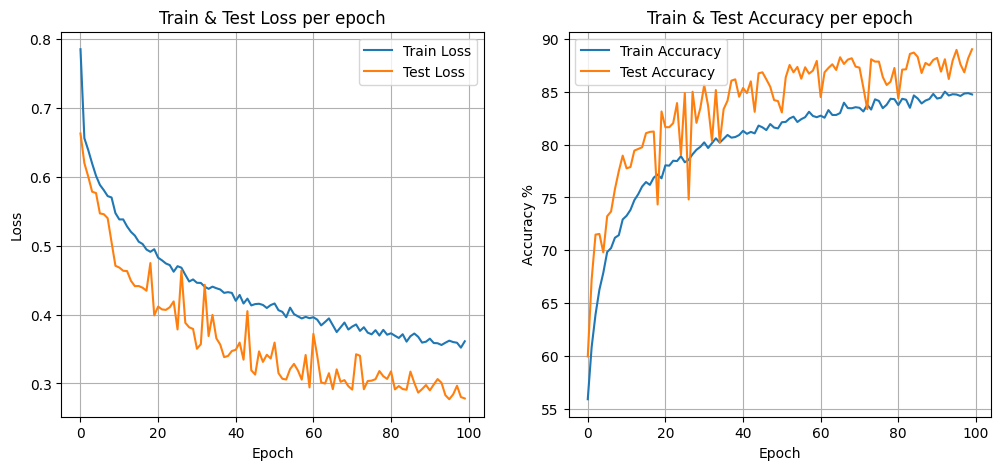

In [147]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()

In [148]:
from torch.utils.data import Subset

In [149]:
train_100_images = Subset(train_data_augmentation, range(100))
test_20_images = Subset(test_data_augmentation, range(20))

len(train_100_images), len(test_20_images)

(100, 20)